<a href="https://colab.research.google.com/github/nrzsdy1993/Deeplearning_Basic/blob/main/5_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [27]:
#MNIST tensorflow.keras
from tensorflow.keras import datasets
import numpy as np


In [28]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2. 데이터 시각화 (EDA)

In [29]:
import matplotlib.pyplot as plt

* 이미지 확인

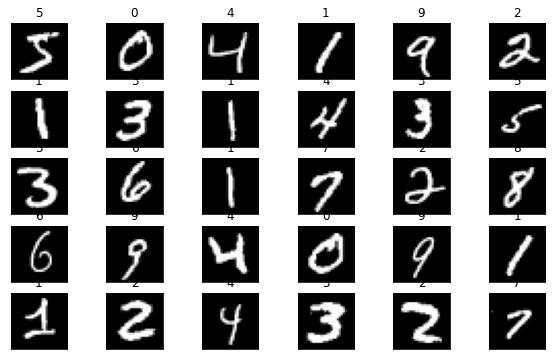

In [30]:
plt.figure(figsize=(10,6))         #이미지 사이즈 조절
for i in range(30):
  plt.subplot(5,6,i+1)
  img=x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap ='gray')      #회색으로 변환
  plt.title(label)
  plt.xticks([])            #중간에 숫자 지우기
  plt.yticks([])
plt.show()

* 실제 데이터 확인

In [31]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

* 데이터 시각화

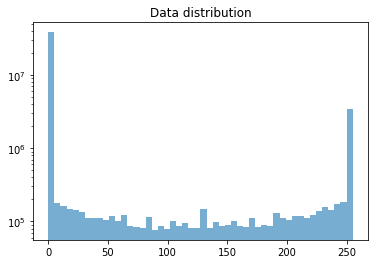

In [32]:
plt.title("Data distribution")
plt.hist(np.reshape(x_train, (60000*28*28)),log=True, bins=50, alpha=0.6)         #reshape(원하는 대상, 차원)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [33]:
#x: np array

def minmax(x):
  x_min= np.min(x)
  x_max= np.max(x)
  return (x-x_min) / (x_max-x_min)

In [34]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)
x_train_minmax.shape, x_test_minmax.shape

((60000, 28, 28), (10000, 28, 28))

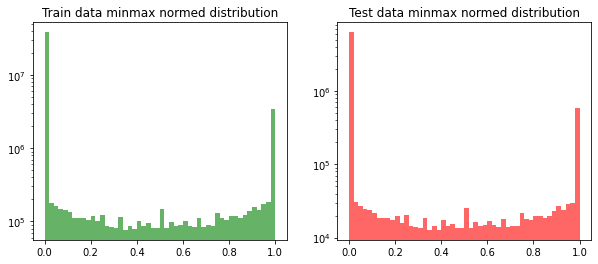

In [35]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data minmax normed distribution")
plt.hist(np.reshape(x_train_minmax, (60000*28*28)),log=True, bins=50, color='green', alpha=0.6)         #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data minmax normed distribution")
plt.hist(np.reshape(x_test_minmax, (10000*28*28)),log=True, bins=50, color='red',alpha=0.6)         #reshape(원하는 대상, 차원)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [36]:
def z_score(x):
  x_mean= np.mean(x)
  x_std= np.std(x)

  return (x-x_mean) / x_std

In [37]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)
x_train_z_score.shape, x_test_z_score.shape

((60000, 28, 28), (10000, 28, 28))

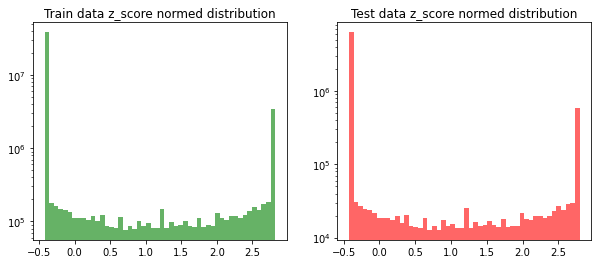

In [38]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data z_score normed distribution")
plt.hist(np.reshape(x_train_z_score, (60000*28*28)),log=True, bins=50, color='green', alpha=0.6)         #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data z_score normed distribution")
plt.hist(np.reshape(x_test_z_score, (10000*28*28)),log=True, bins=50, color='red',alpha=0.6)         #reshape(원하는 대상, 차원)

plt.show()

### **one-hot coding**

In [39]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


# 모델
---

## 1. 모델구현
---

In [40]:
from tensorflow.keras import models, layers, optimizers

### **Softmax regression**

In [41]:
sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape = [28,28]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [42]:
dnn = models.Sequential(name='DNN')
# input layer
dnn.add(layers.Flatten(input_shape = [28,28]))
# hidden layer
dnn.add(layers.Dense(100, activation='relu'))
dnn.add(layers.Dense(100, activation='relu'))
# output layer  (고정)
dnn.add(layers.Dense(10, activation='softmax'))
dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [44]:
cnn = models.Sequential(name='CNN')
# x data :(28,28)->2차원
# dense : (764) -> 1차원
# convolution: (28,28,1) -> 3차원 (흑백이라 1, 컬러이면 3)

# input layer
cnn.add(layers.Reshape([28,28,1], input_shape = [28,28]))
# hidden layer
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  # output의 차원 (숫자 10 (임의))
cnn.add(layers.MaxPool2D(pool_size=3))
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  
cnn.add(layers.MaxPool2D(pool_size=3))

cnn.add(layers.Flatten())

# output layer  (고정)
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 10)          2510      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [47]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
sr.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4548 - acc: 0.8809
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4031 - acc: 0.8910
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3769 - acc: 0.8970
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3602 - acc: 0.9006
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3484 - acc: 0.9030
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3394 - acc: 0.9053
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3322 - acc: 0.9075
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - acc: 0.9089
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3214 - acc: 0.9103
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3172 - acc: 0.9117
Epoch 11/20
1875/1875 [======

### **DNN**

In [49]:
dnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
dnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6877 - acc: 0.8134
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - acc: 0.9127
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2511 - acc: 0.9272
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2174 - acc: 0.9380
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1917 - acc: 0.9453
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1723 - acc: 0.9507
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1558 - acc: 0.9556
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429 - acc: 0.9590
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1319 - acc: 0.9625
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1229 - acc: 0.9656
Epoch 11/20
1875/1875 [======

### CNN

In [50]:
cnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
cnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 1.2061 - acc: 0.6039
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3480 - acc: 0.8964
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2441 - acc: 0.9265
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1955 - acc: 0.9418
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1673 - acc: 0.9499
Epoch 6/20
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1485 - acc: 0.9558
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1353 - acc: 0.9594
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1247 - acc: 0.9628
Epoch 9/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1161 - acc: 0.9651
Epoch 10/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1093 - acc: 0.9671
Epoch 11/

## 3. 성능평가
---

### Softmax Regression

In [53]:
sr.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 0s 1ms/step - loss: 0.2830 - acc: 0.9211


[0.2829776108264923, 0.9211000204086304]

### DNN

In [54]:
dnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 1s 1ms/step - loss: 0.0889 - acc: 0.9737


[0.0889335349202156, 0.9736999869346619]

### CNN

In [55]:
cnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 2s 5ms/step - loss: 0.0745 - acc: 0.9789


[0.07445081323385239, 0.9789000153541565]